# HOMEWORK 2
## Exploratory Data Analysis
### Syeda Samah Daniyal, 07838
### sd07838@st.habib.edu.pk

In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\samah\OneDrive - Habib University\Desktop\HU\5th sem\Data Science\FIFA_Players_Data.csv")
df

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,220806,E. Redman,Ellis Redman,17,9/26/1996,187,81,Wales,Newport County,41,...,NaN,NaN,66.0,25.0,29.0,30.0,39.0,53.0,26,56
15461,225509,A. Collins,Aaron Collins,17,6/1/1997,178,57,Wales,Newport County,41,...,NaN,NaN,64.0,41.0,27.0,35.0,27.0,41.0,30,47
15462,217591,P. Żemło,Piotr Żemło,18,7/10/1995,190,76,Poland,Wisła Kraków,40,...,NaN,NaN,58.0,27.0,35.0,31.0,52.0,68.0,32,74+13
15463,222947,T. Davies,Tom Davies,22,4/18/1992,180,70,England,Fleetwood Town,40,...,NaN,NaN,72.0,27.0,27.0,30.0,35.0,61.0,35,70


### PART 1: Data Cleaning

In [8]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Listing columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values and number of values missing:\n", missing_columns)

Columns with missing values and number of values missing:
 release_clause_eur      15465
team_position             232
team_jersey_number        232
joined                   1151
contract_valid_until      239
nation_position         14409
nation_jersey_number    14409
pace                     1703
shooting                 1703
passing                  1703
dribbling                1703
defending                1703
physic                   1703
dtype: int64


In [9]:
#dropping release_clause_eur column since it has no value in it, hence it is not affecting our present data
df.drop(columns=['release_clause_eur'], inplace=True) 
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9


In [10]:
#for "joined", i will be filling the null values with the median joining date since it will likely not effect the analysis to a great extent
df['joined'] = pd.to_datetime(df['joined'])
median_date = df['joined'].median()
df['joined'] = df['joined'].fillna(median_date)

In [11]:
#for null values in 'nation position' I am assuming that the player has not played for their national team hence they do not have a position
df['nation_position'] = df['nation_position'].fillna('Not Applicable') 

In [12]:
#for 'team position' I'm replacing the null values with 'Unknown' since we cannot make an educated guess from the given data for the particular players position in team
df['team_position'] = df['team_position'].fillna('Unknown')
#to indicate missing data for jersey number I'm placing -1 to indicate that data is missing since -1 cannot be a number on jersey
df['team_jersey_number'] = df['team_jersey_number'].fillna(-1)

In [13]:
#filling it with the date that is common for most of the players
df['contract_valid_until'] = pd.to_datetime(df['contract_valid_until'], errors='coerce')
mode_date = df['contract_valid_until'].mode()[0]
df['contract_valid_until'] = df['contract_valid_until'].fillna(mode_date)

In [14]:
#to indicate missing data for jersey number I'm placing -1 to indicate that data is missing since -1 cannot be a number on jersey
df['nation_jersey_number'] = df['nation_jersey_number'].fillna(-1)

In [15]:
#I am replacing pace, shooting, passing, driblling, defending, physic with their mode since I'm assuming that fifa players get similar training and hence what is true for most might be true for those missing
mode_pace = df['pace'].mode()[0]
df['pace'] = df['pace'].fillna(mode_pace)

mode_shooting = df['shooting'].mode()[0]
df['shooting'] = df['shooting'].fillna(mode_shooting)

mode_passing = df['passing'].mode()[0]
df['passing'] = df['passing'].fillna(mode_passing)

mode_dribbling = df['dribbling'].mode()[0]
df['dribbling'] = df['dribbling'].fillna(mode_dribbling)

mode_defending = df['defending'].mode()[0]
df['defending'] = df['defending'].fillna(mode_defending)

mode_physic = df['physic'].mode()[0]
df['physic'] = df['physic'].fillna(mode_physic)

In [16]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Listing columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values and number of values missing:\n", missing_columns)

Columns with missing values and number of values missing:
 Series([], dtype: int64)


In [17]:
# Function to process the values in skill_ball_control and power_stamina since they have expressions in the columns
def process_skill_value(value):
    if isinstance(value, str):
        if '+' in value or '-' in value:
            return eval(value) 
    return int(value)

# Applying the function to both columns
df['skill_ball_control'] = df['skill_ball_control'].apply(process_skill_value).astype(int)
df['power_stamina'] = df['power_stamina'].apply(process_skill_value).astype(int)
df

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,76
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,89,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,91,89
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,67.0,62.0,59.0,64.0,28.0,71.0,31,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,220806,E. Redman,Ellis Redman,17,9/26/1996,187,81,Wales,Newport County,41,...,Not Applicable,-1.0,66.0,25.0,29.0,30.0,39.0,53.0,26,56
15461,225509,A. Collins,Aaron Collins,17,6/1/1997,178,57,Wales,Newport County,41,...,Not Applicable,-1.0,64.0,41.0,27.0,35.0,27.0,41.0,30,47
15462,217591,P. Żemło,Piotr Żemło,18,7/10/1995,190,76,Poland,Wisła Kraków,40,...,Not Applicable,-1.0,58.0,27.0,35.0,31.0,52.0,68.0,32,87
15463,222947,T. Davies,Tom Davies,22,4/18/1992,180,70,England,Fleetwood Town,40,...,Not Applicable,-1.0,72.0,27.0,27.0,30.0,35.0,61.0,35,70


In [18]:
# df.to_csv(r'C:\Users\samah\Downloads\cleaned_FIFA_Players_Data.csv', index=False)

### PART 2: Data Analysis

In [20]:
df2 = pd.read_csv(r"C:\Users\samah\Downloads\cleaned_FIFA_Players_Data.csv")
df2

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,76
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,89,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,91,89
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,67.0,62.0,59.0,64.0,28.0,71.0,31,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,220806,E. Redman,Ellis Redman,17,9/26/1996,187,81,Wales,Newport County,41,...,Not Applicable,-1.0,66.0,25.0,29.0,30.0,39.0,53.0,26,56
15461,225509,A. Collins,Aaron Collins,17,6/1/1997,178,57,Wales,Newport County,41,...,Not Applicable,-1.0,64.0,41.0,27.0,35.0,27.0,41.0,30,47
15462,217591,P. Żemło,Piotr Żemło,18,7/10/1995,190,76,Poland,Wisła Kraków,40,...,Not Applicable,-1.0,58.0,27.0,35.0,31.0,52.0,68.0,32,87
15463,222947,T. Davies,Tom Davies,22,4/18/1992,180,70,England,Fleetwood Town,40,...,Not Applicable,-1.0,72.0,27.0,27.0,30.0,35.0,61.0,35,70


##### Summary tables using groupby:

In [43]:
# Grouped by nationality and calculating the mean overall rating for that country through its players
df2.groupby('nationality')['overall'].mean().reset_index()


,nationality,overall
0,Albania,65.000000
1,Algeria,68.200000
2,Angola,64.000000
3,Antigua & Barbuda,60.333333
4,Argentina,66.404181
...,...,...
143,Uzbekistan,66.800000
144,Venezuela,68.142857
145,Wales,61.556522
146,Zambia,68.250000


##### This table shows the average overall rating of players grouped by their nationality, indicating that which country has stronger or more talented players on average i.e. the higher the overall rating the better player that country has on average.

In [56]:
# Group by team_position and calculate mean of key attributes
df2.groupby('team_position')[['pace', 'passing', 'defending', 'shooting']].mean().reset_index()

,team_position,pace,passing,defending,shooting
0,CAM,70.920863,66.352518,41.302158,63.805755
1,CB,57.119048,49.761905,66.357143,40.071429
2,CDM,61.677686,65.041322,65.644628,53.396694
3,CF,71.666667,73.888889,32.888889,74.111111
4,CM,63.410714,64.553571,57.982143,55.821429
5,GK,67.000000,59.000000,28.000000,62.000000
6,LAM,77.684211,63.578947,39.315789,60.842105
7,LB,72.939096,58.823183,63.616896,46.534381
8,LCB,59.608696,49.112319,67.048913,38.561594
9,LCM,67.208202,65.205047,56.441640,58.315457


##### This table helps us understand that which attributes are typically stronger or weaker for players at different positions. Hence the higher the value the better players are at that attribute on average.

In [64]:
# Grouped by nationality and calculating the median of height
df2.groupby('nationality')['height_cm'].median().reset_index()

,nationality,height_cm
0,Albania,181.0
1,Algeria,180.0
2,Angola,184.0
3,Antigua & Barbuda,176.0
4,Argentina,179.0
...,...,...
143,Uzbekistan,178.0
144,Venezuela,180.0
145,Wales,180.0
146,Zambia,178.0


##### This table reflects the typical height for players from different countries

#### Univariate analysis:

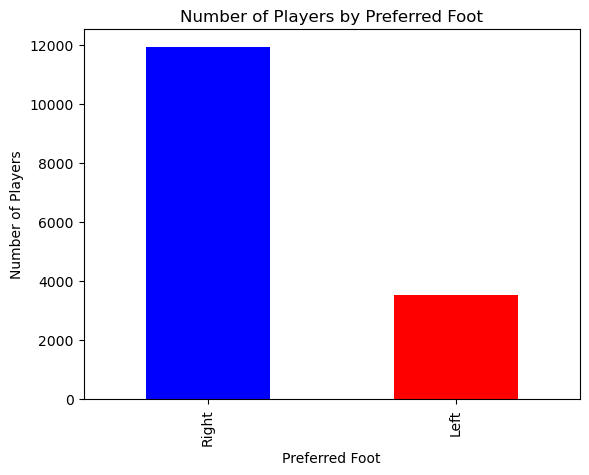

In [87]:
import matplotlib.pyplot as plt

# Plotting bar chart for preferred foot
df2['preferred_foot'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Players by Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Players')
plt.show()

##### This bar chat helps us visualise that most of the FIFA players prefer using their right foot while playing.

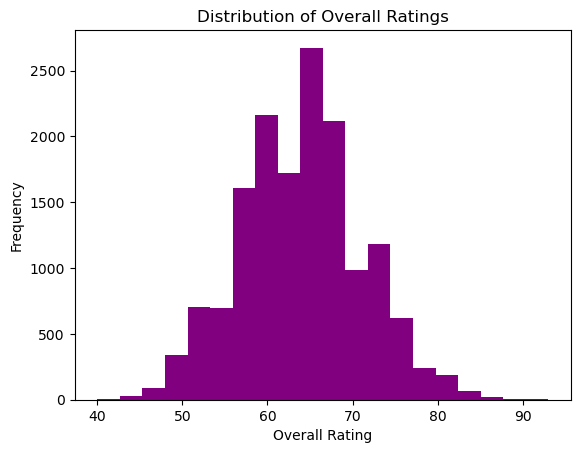

In [91]:
# Plotting histogram for overall ratings
df2['overall'].plot(kind='hist', bins=20, color='purple')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

##### This histogram helps us visualise the spread and frequency of overall rating, highlighting that most of the players have a rating between 60 to 70.

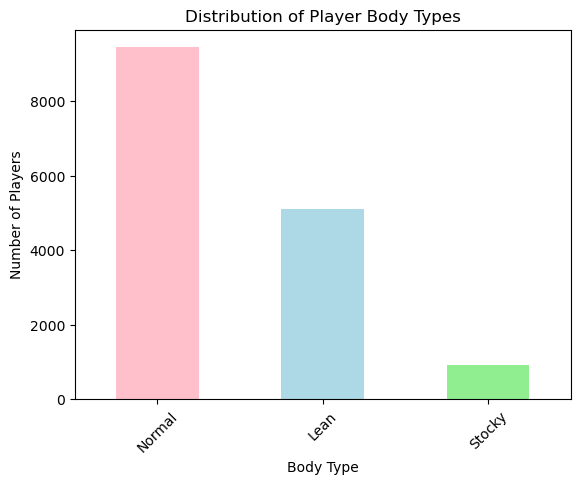

In [99]:
# Plotting bar chart for player body types
df2['body_type'].value_counts().plot(kind='bar', color=['pink','lightblue','lightgreen'])
plt.title('Distribution of Player Body Types')
plt.xlabel('Body Type')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

##### This visual helps us understand that most of the FIFA players have a normal body type and that they are rarely stocky.

#### Bivariate Analysis:

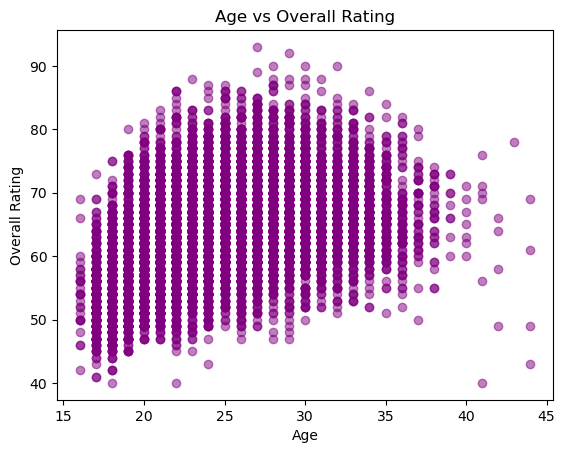

In [127]:
# Scatter plot for age vs overall rating (Continuous vs. Continuous)
plt.scatter(df2['age'], df2['overall'], alpha=0.5, color='purple')
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

##### This scatter plot shows the relationship between age and overall rating. It helps identify that there are less older players and they also have less to average rating. Moreover, the best ratings are of players aged between 25 and 35.

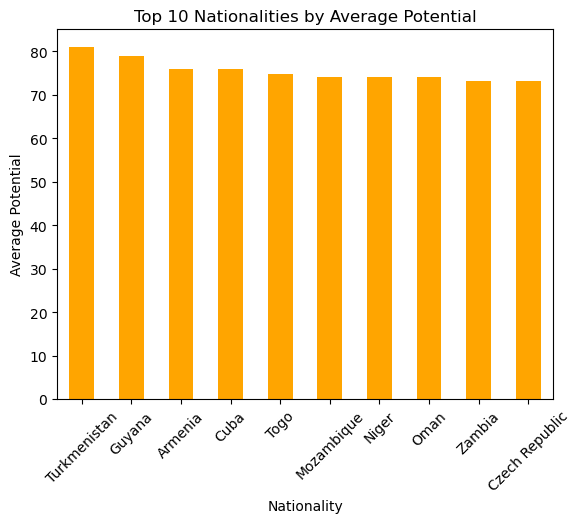

In [125]:
# Bar chart for nationality vs average potential (Discrete vs. Continuous)
df2.groupby('nationality')['potential'].mean().nlargest(10).plot(kind='bar', color='orange')
plt.title('Top 10 Nationalities by Average Potential')
plt.xlabel('Nationality')
plt.ylabel('Average Potential')
plt.xticks(rotation=45)
plt.show()

##### This bar chart shows the average potential for players from the top 10 nationalities. So we can see that these 10 countries have players with the best potential and the over best on average are from Turkmenistan.

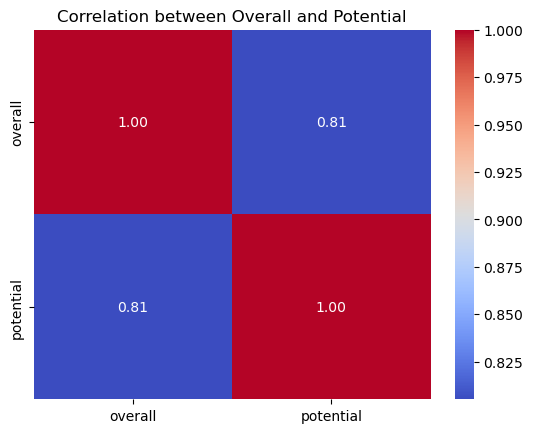

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df2[['overall', 'potential']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Overall and Potential')
plt.show()

##### This heatmap shows the correlation coefficient between overall rating and potential. A strong positive correlation indicates that players with higher potential have higher overall ratings.

#### Multivariate Analysis:

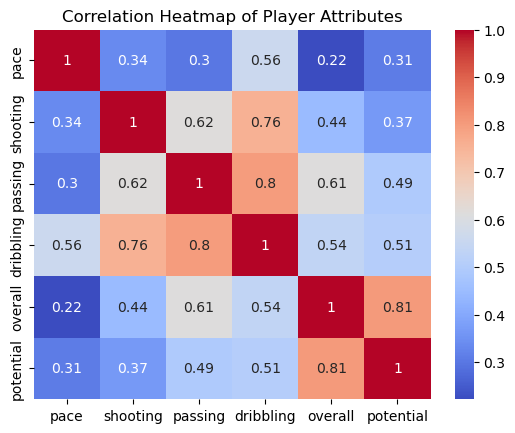

In [150]:
corr = df2[['pace', 'shooting', 'passing', 'dribbling', 'overall', 'potential']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Player Attributes')
plt.show()

##### This heatmap visualizes the correlation between multiple attributes. It helps identify which attributes are strongly correlated with each other. We can see that potential is strongly correlated with overall rating and vice versa. Dribbling is most strongly correlated with passing and vice versa. Shooting is most strongly correlated with dribbling however the vice versa is not true. Lastly pace is most strongly correlated with dribbling however we can see that pace doesn't really have a very strong correlation with any other attribute.

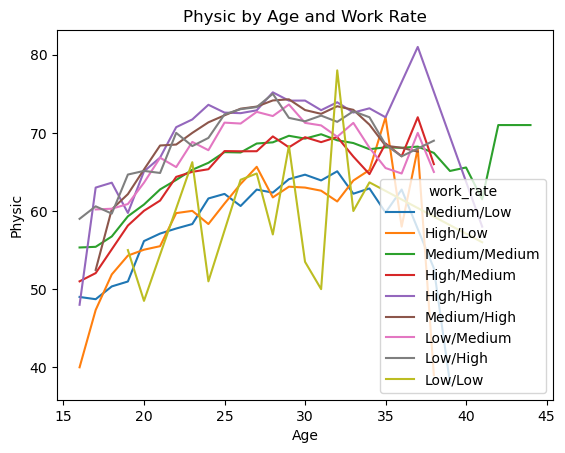

In [162]:
sns.lineplot(x='age', y='physic', hue='work_rate', data=df2, errorbar=None)
plt.title('Physic by Age and Work Rate')
plt.xlabel('Age')
plt.ylabel('Physic')
plt.show()

##### This line plot shows how physical attributes (physic) change with age, with lines distinguished by work rate. We can see that the best work rate (High/High) is when the player has the best physic which us at the age of 36/37. But it can be seen that work_rate low to high is distributed amongst the players regardless of age and physic. Moreover, the players with low/low work rate have the most fluctuation in their physic as age progresses, hence even though work_rate is low the physic tends to be best for players between the age of 30 and 35 hence we can infer that age has more impact on physic than work rate